In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from skimage.segmentation import flood, flood_fill
import colorsys

ImportError: cannot import name 'flood' from 'skimage.segmentation' (/home/sagrika/anaconda3/lib/python3.7/site-packages/skimage/segmentation/__init__.py)

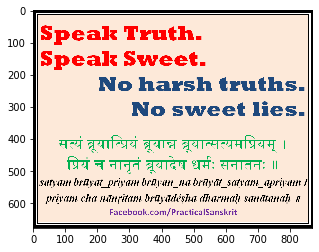

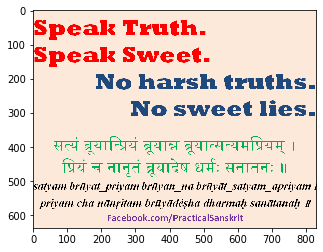

[[125  73  31]
 [  0   0 255]
 [ 80 176   0]
 [  0   0   0]
 [160  48 112]]


In [36]:
im = cv2.imread("../input_data/text5.png")

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

im = im[20:im.shape[0]-20,20:im.shape[1]-20]
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

# binary = (im > 127).astype(np.uint8)

color, colorcnt = np.unique(im.reshape(-1, im.shape[2]), axis=0, return_counts=True);
idx = np.flipud(np.argsort(colorcnt))
color = color[idx[1:6],:]
print(color)

In [71]:
def dfs(x, y, im, out, visited):
    if(x<0 or x>=im.shape[0]):  
        return 0
    if(y<0 or y>=im.shape[1]):
        return 0
    if (visited[x,y]==1):
        return 0
    
    visited[x,y] = 1
    
    if(im[x,y] == 1):
        out[x,y] = 1
        dfs(x+1, y, im, out, visited)
        dfs(x, y+1, im, out, visited)
        dfs(x, y-1, im, out, visited)
        dfs(x-1, y, im, out, visited)  
        dfs(x+1, y+1, im, out, visited)
        dfs(x-1, y-1, im, out, visited)
        dfs(x-1, y+1, im, out, visited)
        dfs(x+1, y-1, im, out, visited)  
    
    return 0

def colored(im):
    number=0
    
    out = np.zeros(im.shape)
    visited = np.zeros(im.shape)    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(visited[i,j]==0 and im[i,j]==1):
                number = number+1
                dfs(i, j, im, out, visited)
    
    return number, out



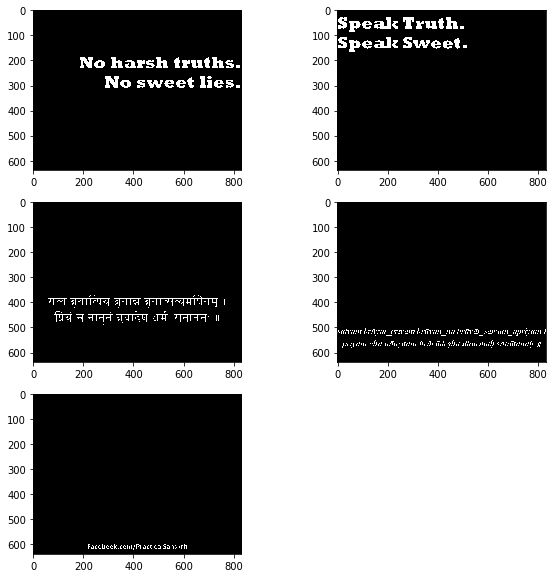

In [65]:
# mask = colored(im, binary, color[1])
# plt.imshow(mask, cmap='gray')

h,w = im.shape[0:2]
bin_im = np.zeros((5,im.shape[0],im.shape[1]))

plt.figure(figsize=(10,10))
for k,c in enumerate(color):
    for i in range(h):
        for j in range(w):
            if np.array_equal(im[i,j,:],c):
                bin_im[k,i,j] = 1
    plt.subplot(3, 2, k+1)
    plt.imshow(bin_im[k], cmap='gray')



[27, 24, 74, 241, 34]


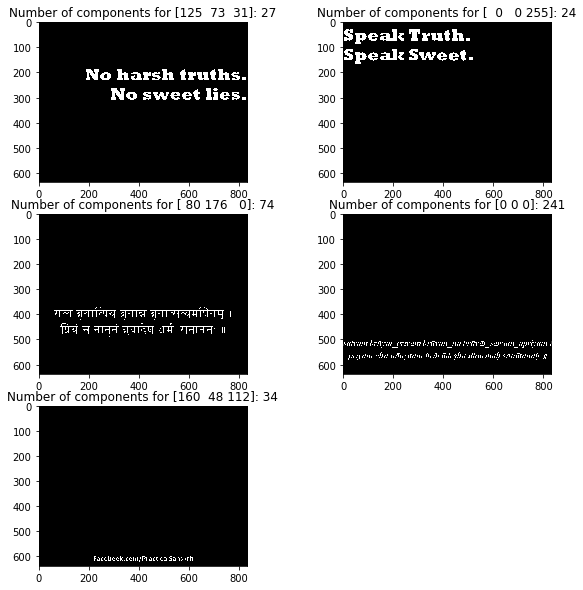

In [74]:
count = []
plt.figure(figsize=(10,10))
# print(bin_im.shape)
for i in range(5):
    num, out = colored(bin_im[i])
    count.append(num)
    plt.subplot(3, 2, i+1)
    plt.imshow(out, cmap='gray')
    plt.title("Number of components for " + str(color[i])+ ": " + str(num))
    
print(count)

# Part 2

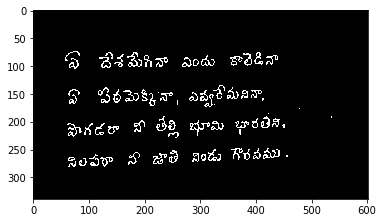

In [22]:
im = cv2.imread("../input_data/521.jpeg", 0)
bin_im = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,6)

plt.imshow(bin_im, cmap='gray')

In [24]:
bin_im[bin_im == 255] = 1

label = np.zeros_like((im))
label = label.astype('int16')

max_label = 1

for i in range(bin_im.shape[0]):
    for j in range(bin_im.shape[1]):
        if bin_im[i, j] == 1:
            if bin_im[i-1,j] or bin_im[i,j-1] or bin_im[i-1,j-1] or bin_im[i-1,j+1]:
                neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                neigh = neigh[neigh > 0]
                label[i,j] = neigh.min()
                not_min = neigh[neigh != neigh.min()]
                for l in not_min:
                    label[label == l] = neigh.min()
                    
            else:
                max_label += 1
                label[i,j] = max_label

unique_vals = np.unique(label)
print(unique_vals)
for val in range(len(unique_vals)):
    label[label == unique_vals[val]] = val
    
print(np.unique(label))
print(label.dtype)

[  0   2   3   4   7   8  11  13  15  16  17  18  24  29  30  32  39  61
  63  64  65  66  67  68  69  72  74  76  79  80  85  86  87  90  99 101
 102 113 115 116 124 131 134 135 136 137 138 139 140 141 143 148 149 150
 152 153 160 166 167 168 179 183 195 201 205 206 207 210 212 213 218 222
 224 226 228 235 240 244 247 250]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
int16


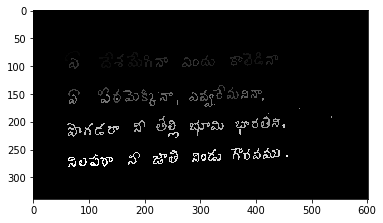

In [25]:
plt.imshow(label, cmap='gray')

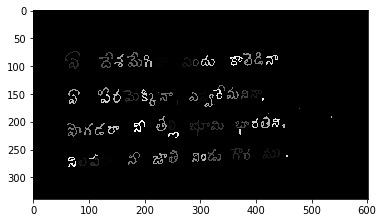

In [27]:
final = np.zeros((im.shape[0], im.shape[1], 3))
final[:, :, 0] = label
final[:, :, 1] = label
final[:, :, 2] = label
final = final.astype('uint8')

plt.imshow(final * 20)

In [28]:
num_regions = len(np.unique(label))
print(num_regions)

80


In [32]:
for i in range(1, num_regions):
    final[label == i] = np.array(colorsys.hsv_to_rgb(i / num_regions, 1, 1)) * 255    

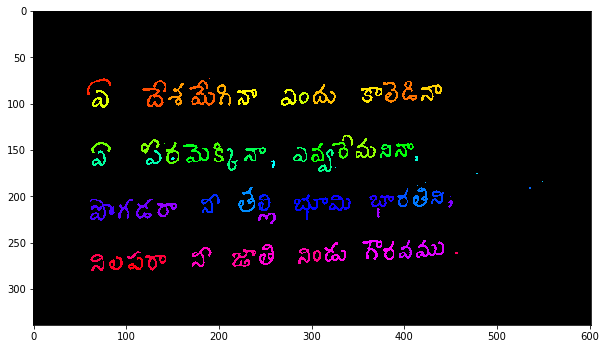

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(final)

In [34]:
def twoPass(image):
    img = image.copy()
    h, w = img.shape
    label = np.zeros_like((img)).astype('int16')

    max_label = 1

    for i in range(h):
        for j in range(w):
            if img[i, j] == 1:
                if img[i-1,j] or img[i,j-1] or img[i-1,j-1] or img[i-1,j+1]:
                    neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                    neigh = neigh[neigh > 0]
                    label[i,j] = neigh.min()
                    not_min = neigh[neigh != neigh.min()]
                    for l in not_min:
                        label[label == l] = neigh.min()

                else:
                    max_label += 1
                    label[i,j] = max_label

    unique_vals = np.unique(label)
#     print(unique_vals)
#     for val in range(len(unique_vals)):
#         label[label == unique_vals[val]] = val

#     print(np.unique(label))
#     print(label.dtype)
    return label

In [35]:
np.unique(label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int16)

In [39]:
components = []
holes = []

for i in range(1, len(np.unique(label))):
    temp = np.zeros_like(label)
    for x in range(label.shape[0]):
        for y in range(label.shape[1]):
            if label[x, y] == i:
                temp[x, y] = 1
    
    components.append(temp)
    
    temp_fill = flood_fill(temp, (0, 0), 1)
    temp_fill = np.invert(temp_fill.astype("bool")) * 1
    
    temp_labels = twoPass(temp_fill)
    num_holes = len(np.unique(temp_labels)) - 1
    holes.append(num_holes)
#     print(i, '\b')
#     print(num_holes)
#     plt.figure(figsize=(15, 15))
#     plt.imshow(temp, cmap='gray')
#     plt.figure(figsize=(15, 15))
#     plt.imshow(temp_fill, cmap='gray')

NameError: name 'flood_fill' is not defined